<a href="https://colab.research.google.com/github/Dima200206/-2/blob/main/%D0%9B%D0%917_%D0%92%D0%BB%D0%B0%D1%81%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛАБОРАТОРНА РОБОТА 8
Розробка нейронної мережі з використанням бібліотеки KERAS
ЗАВДАННЯ 1.
Побудувати звичайну багатошарову нейронну мережу для датасету fashion
mnist
1. Завантажити датасет
2. Роздрукувати 10 зображень.
3. Підготовувати дані, побудувати архітектуру.
4. Використати ранню зупинку і зменшення швидкості для запобіганню
перенавчанню.
5. Вивести архітектуру моделі.
6. Зберегти модель на гугл диск.
7. Побудувати графіки функції втрат і точності для тренувальних і
тестових даних
8. Вивести класифікаційний звіт.
9. Результати розпізнавання із прогнозованим і справжнім класом


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


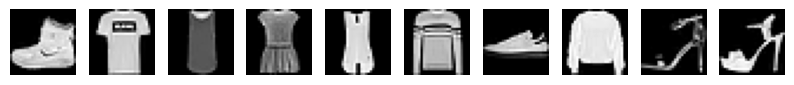

In [2]:
# Plot first 10 images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [3]:
# Reshape data to add channel dimension (for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build a simple MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Set up early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=20,
                    callbacks=[early_stopping, reduce_lr])



Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7637 - loss: 0.6773 - val_accuracy: 0.8455 - val_loss: 0.4206 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8526 - loss: 0.4038 - val_accuracy: 0.8608 - val_loss: 0.3872 - learning_rate: 0.0010
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8653 - loss: 0.3740 - val_accuracy: 0.8664 - val_loss: 0.3707 - learning_rate: 0.0010
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8745 - loss: 0.3457 - val_accuracy: 0.8736 - val_loss: 0.3531 - learning_rate: 0.0010
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8788 - loss: 0.3252 - val_accuracy: 0.8717 - val_loss: 0.3560 - learning_rate: 0.0010
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8824 - loss: 0.3165 - val_accuracy: 0.8772 - val_loss: 0.3406 - learning_rate: 0.0010
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8862 

In [5]:
# Display model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

# Save the model to Google Drive
model.save('/content/gdrive/My Drive/fashion_mnist_model.h5')


MessageError: Error: credential propagation was unsuccessful

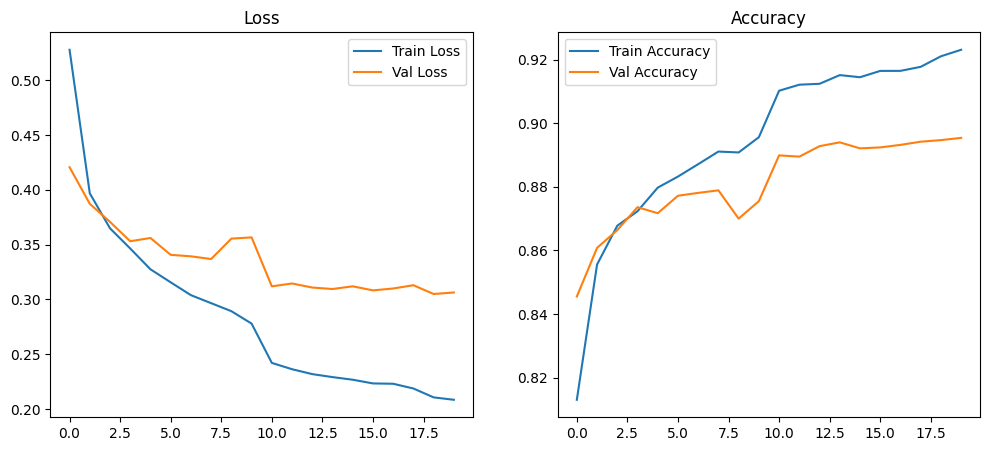

In [7]:
# Plot loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()


In [8]:
# Predictions on test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print classification report
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.89      0.91      0.90      1000
           4       0.81      0.82      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.72      0.72      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



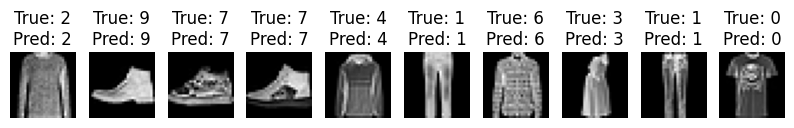

In [9]:
# Display 10 random images with their true and predicted labels
indices = np.random.choice(range(len(x_test)), 10)

plt.figure(figsize=(10,10))
for i, idx in enumerate(indices):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.show()



Завдання 2
Побудувати нейронну мережу, аналогічну завданню 1 для датасета fashion
mnist
Використати Keras Tuner підбору гіперпараметрів моделі.
Порівняти результати завдання 1 і 2 (точність і функцію втрат).
Написати висновки.
Лабораторна робота здається у вигляді colab або jupyter notebook

In [10]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [20]:
import keras_tuner as kt
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model for Keras Tuner
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, activation='relu'))

    # Tune the dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(rate=hp_dropout))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Tune the learning rate for the Adam optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [19]:
from keras_tuner.tuners import RandomSearch

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimizing for validation accuracy
    max_trials=5,  # Number of different hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to be built and evaluated for each trial
    directory='my_dir',
    project_name='fashion_mnist_tuning'
)

# Perform the hyperparameter search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Reloading Tuner from my_dir/fashion_mnist_tuning/tuner0.json

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
512               |512               |units
0.4               |0.4               |dropout
0.0001            |0.001             |learning_rate

Epoch 1/10
 396/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5489 - loss: 1.3441

KeyboardInterrupt: 

In [17]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history_tuned = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Save the tuned model
model.save('/content/gdrive/My Drive/fashion_mnist_tuned_model.h5')


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7711 - loss: 0.6455 - val_accuracy: 0.8338 - val_loss: 0.4465
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8469 - loss: 0.4189 - val_accuracy: 0.8557 - val_loss: 0.4010
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8593 - loss: 0.3827 - val_accuracy: 0.8667 - val_loss: 0.3652
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8672 - loss: 0.3590 - val_accuracy: 0.8670 - val_loss: 0.3656
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8723 - loss: 0.3483 - val_accuracy: 0.8694 - val_loss: 0.3601
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8748 - loss: 0.3382 - val_accuracy: 0.8768 - val_loss: 0.3461
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8790 - loss: 0.3294 - val_accuracy: 0.8756 - val_loss: 0.3440
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8811 - loss: 0

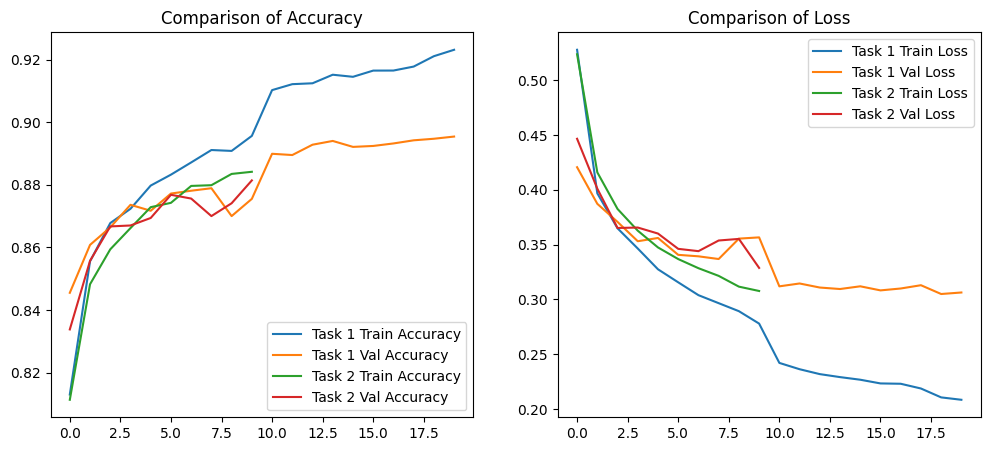

In [18]:
# Plot accuracy for both models
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Task 1 Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Task 1 Val Accuracy')
plt.plot(history_tuned.history['accuracy'], label='Task 2 Train Accuracy')
plt.plot(history_tuned.history['val_accuracy'], label='Task 2 Val Accuracy')
plt.title('Comparison of Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Task 1 Train Loss')
plt.plot(history.history['val_loss'], label='Task 1 Val Loss')
plt.plot(history_tuned.history['loss'], label='Task 2 Train Loss')
plt.plot(history_tuned.history['val_loss'], label='Task 2 Val Loss')
plt.title('Comparison of Loss')
plt.legend()

plt.show()
